In [17]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from datetime import date
from lmfit import Model
import importlib
'imports done'

'imports done'

In [18]:
cases_data = pd.read_csv('../data/11-04-2019/total_cases.csv')
cases_data['Date'] = pd.to_datetime(cases_data['date']).dt.date
cases_data.fillna(0, inplace=True)
cases_data.head()

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe,Date
0,2019-12-31,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-12-31
1,2020-01-01,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-01
2,2020-01-02,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-02
3,2020-01-03,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-03
4,2020-01-04,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-04


In [19]:
testing_data = pd.read_csv('../data/testing/full-list-cumulative-total-tests-per-thousand.csv')
testing_data['tests_per_1000'] = testing_data['Cumulative total tests per thousand'].astype(float)
testing_data['Date'] = pd.to_datetime(testing_data['Date']).dt.date
testing_data_pivot = testing_data.pivot(index='Date', columns='Entity', values = 'tests_per_1000')
testing_data.head()

,Entity,Code,Date,Cumulative total tests per thousand,tests_per_1000
0,Australia,AUS,2020-03-22,5.632530,5.632530
1,Australia,AUS,2020-03-29,8.317959,8.317959
2,Australia,AUS,2020-04-02,10.276328,10.276328
3,Australia,AUS,2020-04-03,10.917240,10.917240
4,Australia,AUS,2020-04-06,11.920501,11.920501


In [20]:
data = pd.merge(cases_data, testing_data_pivot, on = ['Date'], suffixes=('_cases','_tests'))
columns = [column for column in data.columns if '_' in column] + ['date']
data = data[columns]
data.fillna(0, inplace = True)
data.head()

,Australia_cases,Austria_cases,Bahrain_cases,Belgium_cases,Canada_cases,Costa Rica_cases,Czech Republic_cases,Denmark_cases,Ecuador_cases,Estonia_cases,...,Switzerland_tests,Taiwan_tests,Thailand_tests,Tunisia_tests,Turkey_tests,United Kingdom_tests,United States_tests,Uruguay_tests,Vietnam_tests,date
0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-18
1,0,0,0.0,0,0,0.0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-19
2,0,0,0.0,0,0,0.0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-20
3,0,0,0.0,0,0,0.0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-21
4,0,0,0.0,0,0,0.0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-22


/home/ajviswan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ajviswan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


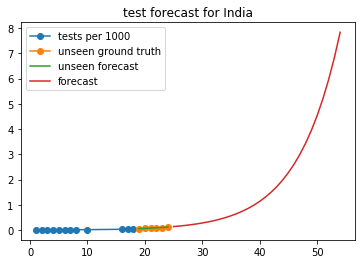

/home/ajviswan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ajviswan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


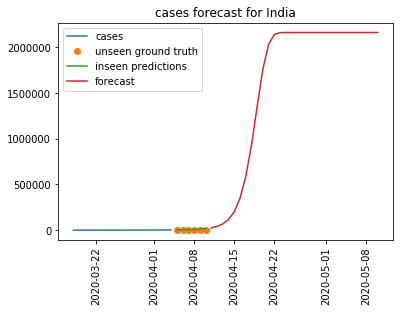

/home/ajviswan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ajviswan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


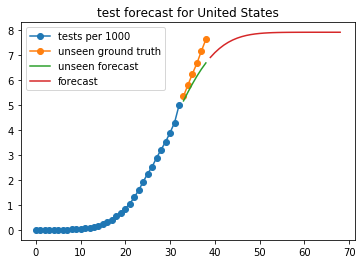

/home/ajviswan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ajviswan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


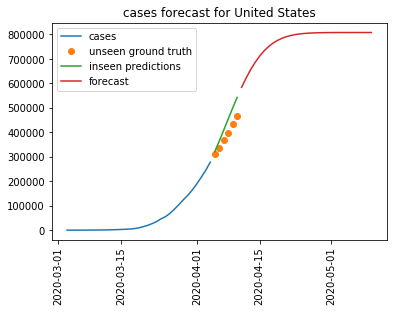

/home/ajviswan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ajviswan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


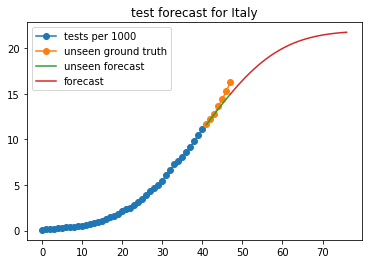

/home/ajviswan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ajviswan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


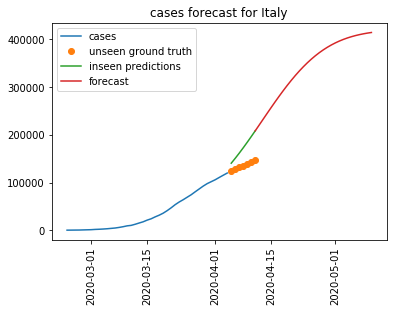

/home/ajviswan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ajviswan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


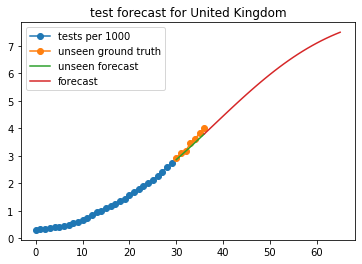

/home/ajviswan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ajviswan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


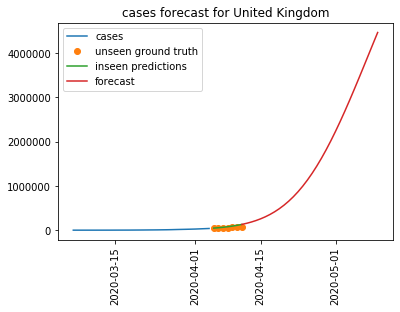

/home/ajviswan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ajviswan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


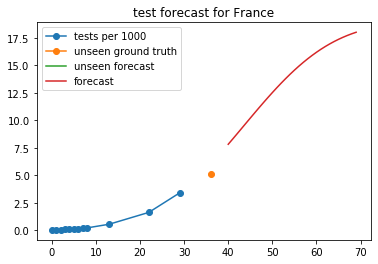

/home/ajviswan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ajviswan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


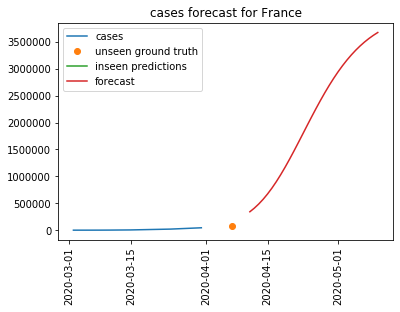

/home/ajviswan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ajviswan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


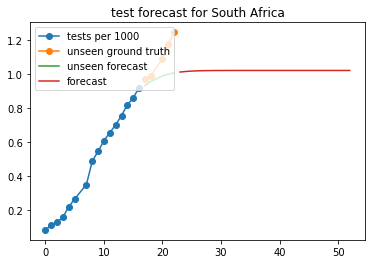

/home/ajviswan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ajviswan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


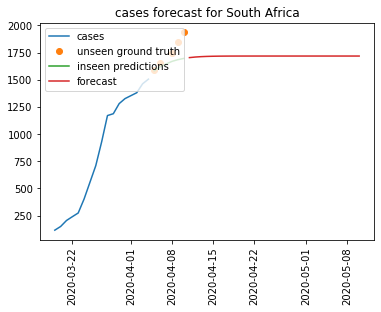

0.36719385079484446

In [28]:

import fitting_helper
importlib.reload(fitting_helper)
from fitting_helper import preprocess

from scipy.stats import multivariate_normal, norm


def gaussian_cdf(x, amp, cen, wid):
    value = norm.cdf(x, cen, wid) * amp
    return value


def gaussian2D_cdf(x, mean_0, mean_1, cov_00, cov_01, cov_10, cov_11, amp):
    mean = np.array([mean_0, mean_1])
    cov = np.array([[cov_00, cov_01], [cov_10, cov_11]])
    value = multivariate_normal.cdf(x, mean, cov) * amp
    return value


loss = 0
countries = ['India', 'United States', 'Italy', 'United Kingdom', 'France', 'South Africa']
for country in countries:
    italy_case_data, case_scaler = preprocess(data, 'date', f'{country}_cases', forecast = 30)
    italy_test_data, test_scaler = preprocess(data, 'date', f'{country}_tests', index_case = 0, forecast = 30)
    italy_data = pd.merge(italy_case_data, italy_test_data, how ='inner', on = ['date'], suffixes=('','_'))

    past_data = italy_data[italy_data.forecast == 0]
    present_data = italy_data[italy_data.forecast == 1]
    forecast_data = italy_data[italy_data.forecast == 2]
    
    X = past_data['processed_date'].values
    Y = past_data[f'processed_{country}_tests'].values

    test_model = Model(gaussian_cdf)
    result = test_model.fit(Y, x=X, amp = 1, cen = 0, wid = 1)
    present_data['test_predictions'] = result.eval(x=present_data['processed_date'].values)
    forecast_data['test_predictions'] = result.eval(x=forecast_data['processed_date'].values)

    plt.title(f'test forecast for {country}')
    plt.plot(X, test_scaler.inverse_transform(Y.reshape((-1, 1))), '-o', label = 'tests per 1000')
    plt.plot(present_data['processed_date'].values, test_scaler.inverse_transform(present_data[f'processed_{country}_tests'].values.reshape((-1, 1))), 'o-', label = 'unseen ground truth')
    plt.plot(present_data['processed_date'].values, test_scaler.inverse_transform(present_data['test_predictions'].values.reshape((-1, 1))), label = 'unseen forecast')
    plt.plot(forecast_data['processed_date'].values, test_scaler.inverse_transform(forecast_data['test_predictions'].values.reshape((-1, 1))), label = 'forecast')
    plt.legend(loc='upper left')
    plt.show()



    X = past_data[['processed_date',f'processed_{country}_tests']].values
    Y = past_data[f'processed_{country}_cases'].values


    model = Model(gaussian2D_cdf)
    positive_definite = '((cov_00 * cov_11) - (cov_10 * cov_01)) > 0'
    model.set_param_hint("cov_00", expr=positive_definite)
    model.set_param_hint("cov_01", expr=positive_definite)
    model.set_param_hint("cov_10", expr=positive_definite)
    model.set_param_hint("cov_11", expr=positive_definite)
    result = model.fit(Y, x=X, mean_0=0.1, mean_1=0.1, cov_00=1, cov_01=0.1, cov_10=0.2, cov_11=1, amp=0.5)

    
    present_data['predictions'] = result.eval(x=present_data[['processed_date','test_predictions']].values)
    forecast_data['predictions'] = result.eval(x=forecast_data[['processed_date','test_predictions']].values)


    plt.title(f'cases forecast for {country}')
    plt.plot(pd.to_datetime(past_data['date']), case_scaler.inverse_transform(Y.reshape((-1, 1))), label = 'cases')
    plt.plot(pd.to_datetime(present_data['date']), case_scaler.inverse_transform(present_data[f'processed_{country}_cases'].values.reshape((-1, 1))), 'o', label = 'unseen ground truth')
    plt.plot(pd.to_datetime(present_data['date']), case_scaler.inverse_transform(present_data['predictions'].values.reshape((-1, 1))), label = 'inseen predictions')
    plt.plot(pd.to_datetime(forecast_data['date']), case_scaler.inverse_transform(forecast_data['predictions'].values.reshape((-1, 1))), label = 'forecast')
    plt.xticks(rotation=90)
    plt.legend(loc='upper left')
    plt.show()
    
    loss += abs(present_data[f'processed_{country}_cases'].values - present_data[f'predictions'].values).mean()
    
loss / len(countries)